# 01 - Problem (case study)

Data desription:
    
Data collected by an auto insurance company about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts.

Goal:

To understand customer demographics and buying behaviour in order to increase profitable customer response, retention, and growth.

02 - Getting Data

Read the .csv file.

In [2]:
import pandas as pd
data = pd.read_csv('marketing_customer_analysis.csv')
data = data.drop(['Unnamed: 0'], axis=1)
print(data.shape)
data.head()

(10910, 25)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## 03 - Cleaning/Wrangling/EDA

Change headers names.

In [14]:
cols = []
for column in data.columns:
    cols.append(column.lower())
data.columns = cols
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

Deal with NaN values.

In [15]:
round(data.isna().sum()/len(data),4)*100

customer                          0.00
state                             5.78
customer lifetime value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective to date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         5.80
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type                     50.25
dtype: float64

In [18]:
data['state']=data['state'].fillna('California') #changed to mode
data['response']=data['response'].fillna('No') #changed to mode
data['vehicle class']=data['vehicle class'].fillna('Four-Door Car') #changed to mode
data['vehicle size']=data['vehicle size'].fillna('Medsize') #changed to mode
data['months since last claim']=data['months since last claim'].fillna(15) #changed to mean
data['number of open complaints']=data['number of open complaints'].fillna(0.0) #mean/median/mode all 0


In [21]:
data['vehicle type'].value_counts()

A    5428
Name: vehicle type, dtype: int64

'vehicle type' has a high rate of NaN values at 50% and the only other value in this column is 'A', so it seems better to drop the entire column instead of deleting all of the rows with Nan values in this column and losing the rest of the data those rows include.

In [24]:
data = data.drop(['vehicle type'], axis=1)

KeyError: "['vehicle type'] not found in axis"

Categorical Features.

In [27]:
import numpy as np

In [42]:
data.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

'effective to date' column needs to be changed in order to be able to use data later, rename 'effective to month'

In [58]:
data['effective to date'] = pd.to_datetime(data['effective to date'], errors='coerce')

def month_to_month(x): 
    months = ['January', 'February']
    m = x.month
    y = months[m-1]
    return y

#changing from datetime to categorical in order to be able to use the data later
data['effective to month'] = list(map(month_to_month, data['effective to date']))

data = data.drop(['effective to date'], axis=1)

Removing 'customer' column as it is only an identifier and does not contain any useful data.

In [60]:
data = data.drop(['customer'], axis=1)

In [61]:
data.columns

Index(['state', 'customer lifetime value', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'effective to month'],
      dtype='object')

Categorical Features.

In [62]:
data_categorical = data.select_dtypes(include = object)
data_categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location code', 'marital status', 'policy type', 'policy',
       'renew offer type', 'sales channel', 'vehicle class', 'vehicle size',
       'effective to month'],
      dtype='object')

Numerical Features.

In [63]:
data_numerical = data.select_dtypes('number')
data_numerical.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

Exploration.

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data_categorical.describe(include='all').T

,count,unique,top,freq
state,10910,5,California,4183
response,10910,2,No,9444
coverage,10910,3,Basic,6660
education,10910,5,Bachelor,3272
employmentstatus,10910,5,Employed,6789
gender,10910,2,F,5573
location code,10910,3,Suburban,6902
marital status,10910,3,Married,6319
policy type,10910,3,Personal Auto,8128
policy,10910,9,Personal L3,4118


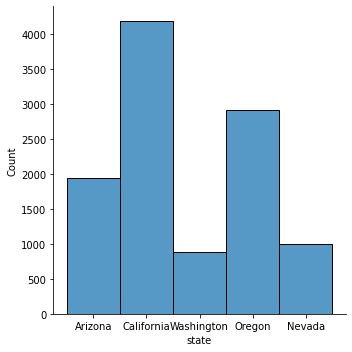

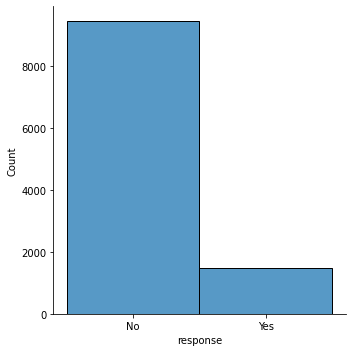

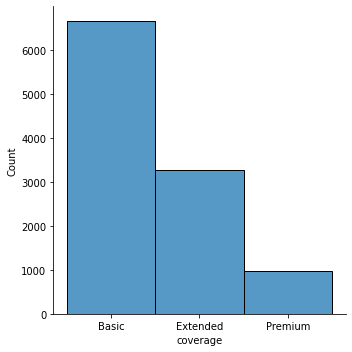

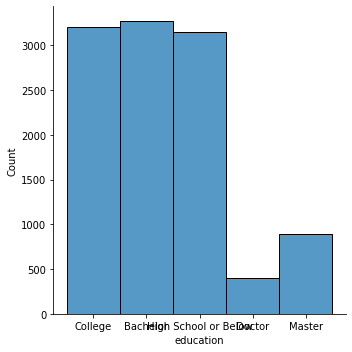

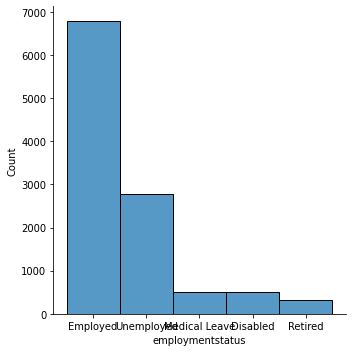

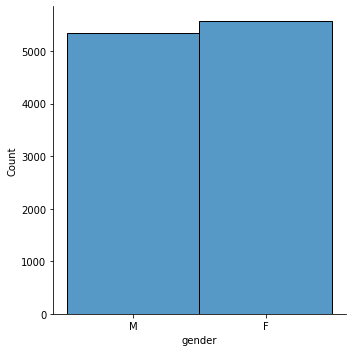

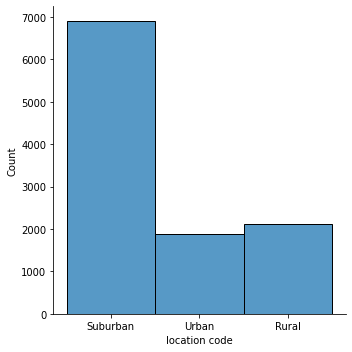

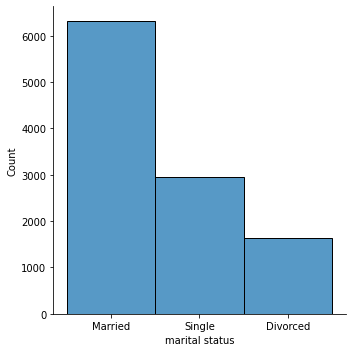

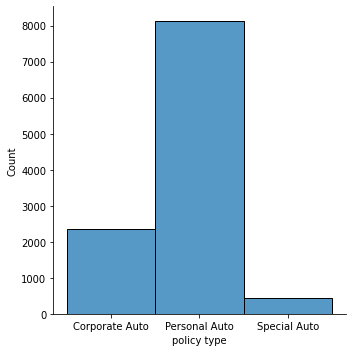

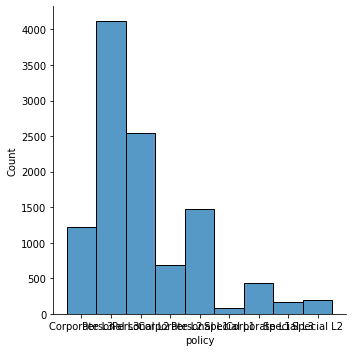

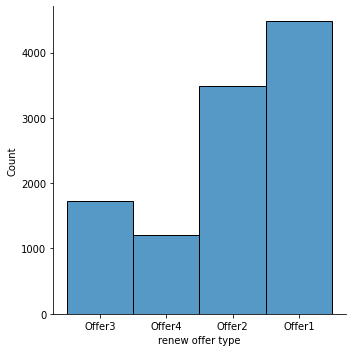

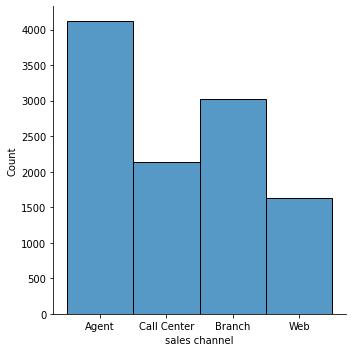

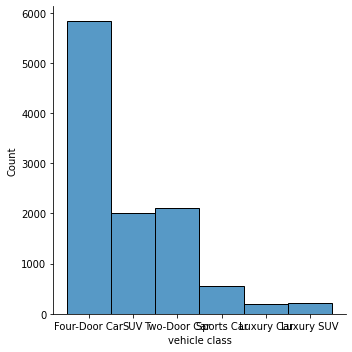

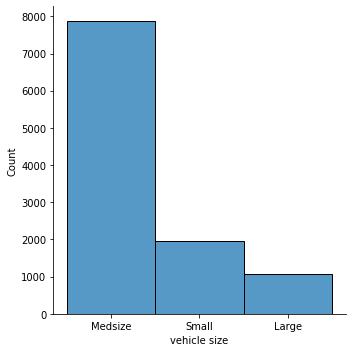

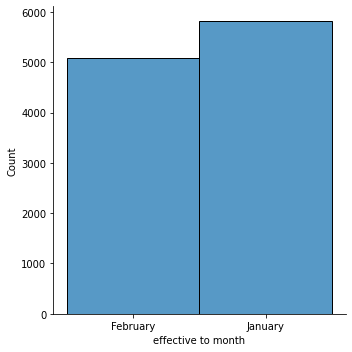

In [77]:
for col in data_categorical.columns:
    sns.displot(data_categorical[col])
    plt.show()

In [ ]:
bombplot??? box-plots? remove outliers? log transformations? normalize...

In [66]:
data_numerical.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,15.140422,9.783582,0.000000,7.000000,15.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

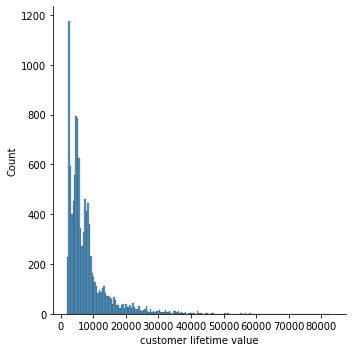

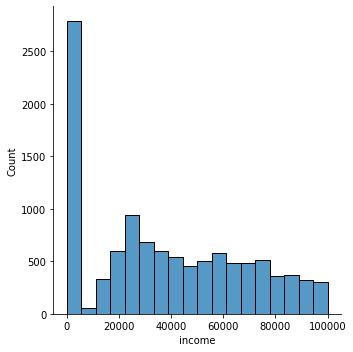

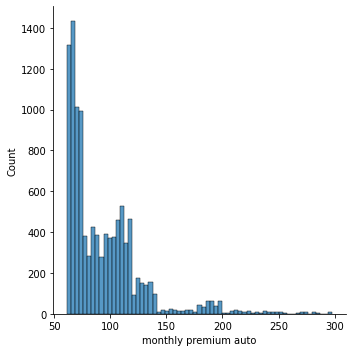

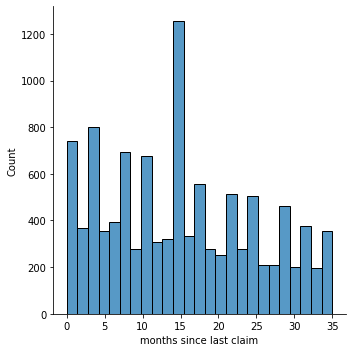

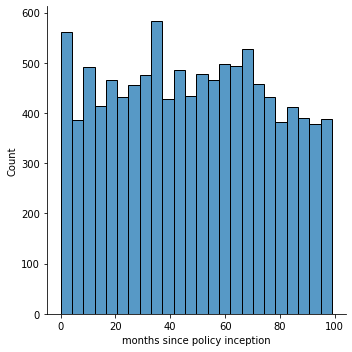

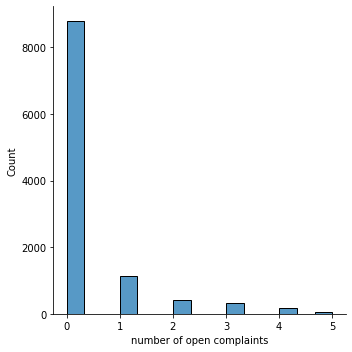

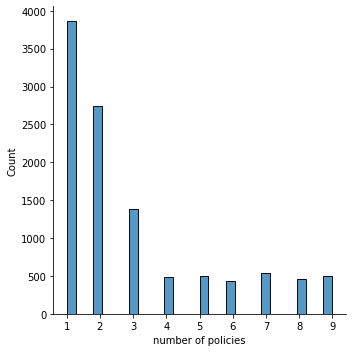

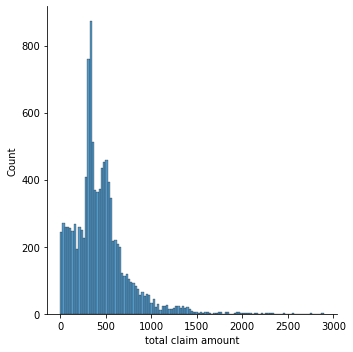

In [71]:
for col in data_numerical.columns:
    sns.displot(data_numerical[col])
    plt.show()

In [72]:
correlations_matrix = data_numerical.corr()
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.028306,0.403069,0.015708,0.016960,-0.030616,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.023073,-0.005903,0.008425,-0.009960,-0.354141
monthly premium auto,0.403069,-0.009788,1.000000,0.008502,0.018953,-0.010059,-0.020505,0.631799
months since last claim,0.015708,-0.023073,0.008502,1.000000,-0.038156,0.002594,0.007345,0.012678
months since policy inception,0.016960,-0.005903,0.018953,-0.038156,1.000000,0.004165,-0.009123,0.003095
number of open complaints,-0.030616,0.008425,-0.010059,0.002594,0.004165,1.000000,0.001681,-0.012380
number of policies,0.016024,-0.009960,-0.020505,0.007345,-0.009123,0.001681,1.000000,-0.008923
total claim amount,0.232626,-0.354141,0.631799,0.012678,0.003095,-0.012380,-0.008923,1.000000


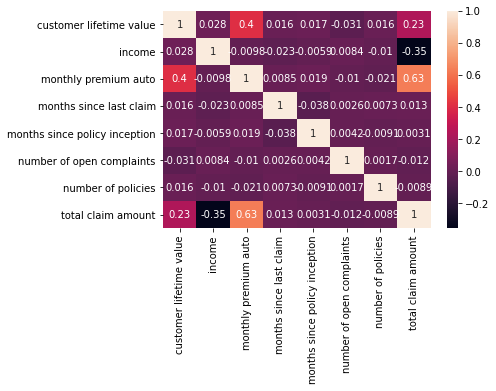

In [73]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# 04 - Processing Data

Dealing with outliers.